### Introduction ###

The following notebook deals with the tasks assigned throughout the semester

### Libraries/Imports ###

The following python libraries have been imported for use in satisdying the requirements of the assinged tasks.


In [35]:
import math                         #import the math library
import itertools                    #import itertools library
import random                       #import random module
import numpy as np                  #import numpy library
import matplotlib.pyplot as plt     #import matplot library
import scipy.stats as stats         #import scipy module
import statsmodels as sm            #import statistical models library
import pandas as pd                 #import pandas library
import seaborn as sns               #import seaborn library


---

### Task 1: Permutations and Combinations ###



**Question**

*Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.*

*Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.*

*Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.*

*Would you accept two errors? Explain.*

The fist step is to calculate the probability of the lady picking the 6 correct cups, that is the 6 cups of tea made with milk first.

In [36]:
n = 12                              #number of cups of tea in experiment
k = 6                               #number of cups wiht milk in first
print(math.comb(n,k))               #calculate and print the numner of potential combinations of cups with milk first based on 12 cups without order (order doesnt matter)


924


The above illustrates that the lady has 1 in 924 chances of correctly grouping the cups of tea assuming she has no special ability identify cups of tea when there are 12 cups of tea, 6 of whcih had milk put in first.

In [37]:
#calculate pobability of the lady correctly selecting the 6 correct cups.

print("Probability of Success: " + str(1/ math.comb(n,k)))

Probability of Success: 0.0010822510822510823


Now, we will look at the overlaps within the data. That is, looking at all the possible combinations of cups available to the lady. Obviously, there is only 1 correct answer, all 6 cups classified correctly and one exactly wrong answer where all 6 cups are grouped correctly by classified as milk first where in reality the selected 6 cups are tea first.

In [38]:
labels = list(range(n))                             #first we create a list containing the 12 possible option [0, 1, ... , 11]
combos = list(itertools.combinations(labels,k))     #Create a list of all the possible combinations consisting of 6 cups


At this point, we have made a list of all the possible 6 cup combinations (924). now we want to create a list of cups that have been made with milk first.

In [39]:
milk_first = random.sample(labels,k)    #use the random library to create a sample of milk first cups of t. k is used as an input here so we can change the parameters of the study and rerun the notebook to update workings. we use the sample function so replacement is not allowed (we can classiify cup x as milk first more than once) 
milk_first.sort()                       #Sort the list for easier assessment
milk_first                              #print out the sorted list of cups that have milk first

[3, 4, 5, 8, 9, 11]

Now we want to know what the overlap between the correct list of cups with milk first and the possible options open to the lady. This will show us how may chances there are to correctly classify 1, 2, 3 etc cups.

Essentially, we will look at all possible combinations calculated above and simply calculate the number of common values in the milk_first variable above and each possible selection.

In [40]:
no_overlaps = []                        #start by creating an empty list to append the assessments to

for x in combos:                        #set up a for loop to run throuh the list of possible combinations in the combos list
    s1 = set(x)                         #convert the x record in the comnbos list to a set
    s2 = set(milk_first)                #convert the milk first list to a set
    overlap = s1.intersection(s2)       #calculate the intersection between x and the milk_first cups
    #print (x, overlap, len(overlap))   #print out the values in the set x, values in the milk_first set and the number of overlap in each
    no_overlaps.append(len(overlap))    #add the length of the over lap to the no_overlaps list we set up earlier. This is essentially the nuber of common values in x and the milk_first set of cups

#print(no_overlaps)

So far, we have identified all the possible combination of cups available to the lady, created a data set that selects the milk_first cups of tea at random and evaluated the overlap between the milk_first cups and the available combinations.

Now we want to look at the rate of occurance of each level of overlap, that is 0 correct classification in the selection all the way up to 6 correct classificaitons.

In [41]:
counts = np.unique(no_overlaps, return_counts=True) #counts all levels of occurance of overlap to understand distribution
counts


(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

<BarContainer object of 7 artists>

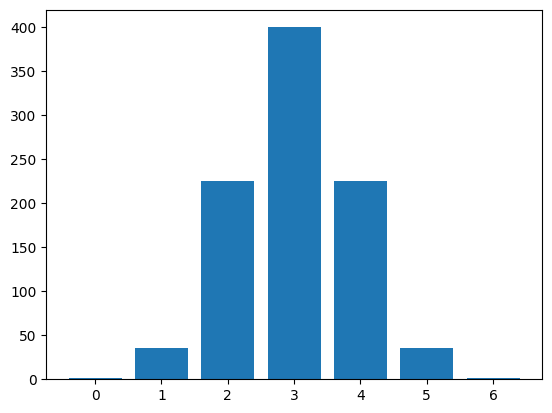

In [42]:
fig, ax = plt.subplots()        #create empty plot for graph
ax.bar(counts[0], counts[1])    #plot the occurance of varying levels of overlap

Next we want to calculate the probability of the lady getting 5 out of 6 cups classified correctly.

In [43]:

one_wrong = (counts[1][(len(counts[1]))-1] + counts[1][(len(counts[1]))-2])/len(combos)     #calculate the probability of the lady classifying 1 cup incorrectly
print("Probability of getting 1 wrong: " + str(one_wrong))                                  #print probability

Probability of getting 1 wrong: 0.04004329004329004


The above analysis illustrates that the lady has a 4% chance of getting 5 out of 6 cups classified correcttly. In my view, this is an acceptable level cetainty to reject the null hypothesis that the lady is guessing at random.

The final step is repeating this analysis, to find the probability of getting 2 wrong.

In [44]:
two_wrong = (counts[1][(len(counts[1]))-1] + counts[1][(len(counts[1]))-2]+ counts[1][(len(counts[1]))-3])/len(combos)  #calculate the probability of the lady classifying 2 cup incorrectly
print("Probability of getting 2 wrong: " + str(two_wrong))                                                              #print probability

Probability of getting 2 wrong: 0.28354978354978355


The above analysis shows a probability of getting 2 cups wrong as 28%. Allowing 2 miclassifications does not provide enough evidence to reject the null hypothesis. Essentially, this means that anyone, guessing if the tea was mande with milk first will correctly classify 4 out of 6 cups 28% of the time.

Summary of results:
- Probability of Correct classification of all 6 cups:    0.01%
- Probability of Correct classification with 1 error:     4.00%
- Probability of Correct classification with 2 errors:    28.35%

---

### Task 2: numpy's Normal Distribution ###

**Question**

*In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.*

*Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.*

*Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.*

First we want to generate a random set of values with normal distribution.

In [45]:
ds = np.random.normal(10.0, 3.0, 100000) #generate a random sample of normally distributred data with 100,000 data points, a mean of 10 and standard deviation of 3
len(ds)

100000

Now that we have generated our dataset we will viualise it using a histogram.

(array([6.000e+00, 5.000e+00, 7.000e+00, 1.700e+01, 3.100e+01, 3.300e+01,
        7.900e+01, 1.180e+02, 1.820e+02, 3.120e+02, 4.590e+02, 6.710e+02,
        8.040e+02, 1.123e+03, 1.562e+03, 2.096e+03, 2.561e+03, 3.243e+03,
        3.765e+03, 4.506e+03, 5.220e+03, 5.752e+03, 6.198e+03, 6.340e+03,
        6.414e+03, 6.311e+03, 6.264e+03, 6.019e+03, 5.446e+03, 4.809e+03,
        4.161e+03, 3.682e+03, 2.896e+03, 2.376e+03, 1.840e+03, 1.395e+03,
        1.055e+03, 7.410e+02, 5.390e+02, 3.430e+02, 2.260e+02, 1.470e+02,
        9.900e+01, 6.300e+01, 2.800e+01, 2.300e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 6.000e+00]),
 array([-2.15684907, -1.66634017, -1.17583127, -0.68532237, -0.19481348,
         0.29569542,  0.78620432,  1.27671322,  1.76722212,  2.25773102,
         2.74823992,  3.23874881,  3.72925771,  4.21976661,  4.71027551,
         5.20078441,  5.69129331,  6.18180221,  6.6723111 ,  7.16282   ,
         7.6533289 ,  8.1438378 ,  8.6343467 ,  9.1248556 ,  9.6153645 ,
        10.

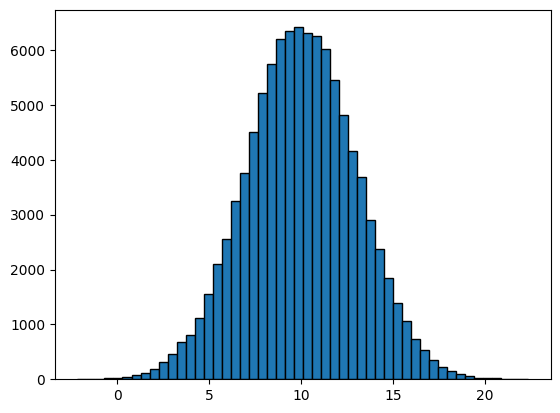

In [46]:
fig, ax = plt.subplots()                       #Create a blank plot
ax.hist(ds, edgecolor = 'black', bins = 50)    #visualise the data created in the ds variable above

The above histogram illustrates the distribution of the data generated. The data appears to be normally distributed which will form the basis of our assumption in relation to the data. Next we will complete a shapiro wilks test in order to test the data for normality

In [47]:
stats.shapiro(ds) #perform shapiro wilks test on the data

C:\Users\mcase\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9999758202896473), pvalue=np.float64(0.8020461635845857))

The above result provides a statistic value of 0.99 and a p-value of 0.94 (based on generated data at time or writing).

A p-value of 5% is what is typically considered to detemrine signifncance. If our p-value was below 5% we would be able to reject the null hypothesis. Note, the confidence level of requirement for the p-value is set by the user. 5% is commmonly used but this can shift up or down depending on the requirements or applicaiton. 

With the null hypotesis of the shapiro wilks test being that the data is drawn from a normal distribution, a p-value of 0.94 gives us confidence that we can not reject the null hypothesis, in other words, we can accept that there is no reason to indicate that the data is not normally distributed.

Next we want to graph our generated data and the normal distribution probability density function.


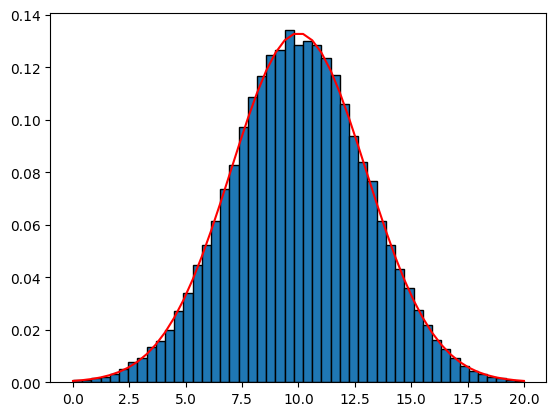

In [48]:
fig, ax = plt.subplots()                                    #first we create a graph area
x = np.linspace(0, 20, 50)                                  #create a variable for creating the histogram bins and the normal distribtuon density function
ax.hist(ds, edgecolor = 'black', density = True, bins = x)  #plot our data in a histogram, note density = true added
ax.plot(x, stats.norm.pdf(x, 10.0, 3.0) , 'r-')             #plot the density function. This took some time to realise I needed to set the standard deviation and mean for the function.
#stats.norm.pdf(x, 10.0, 3.0)


---

### Task 3: t-Test Calculation ###

**Question**

*Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.*

*Patient ID	0	1	2	3	4	5	6	7	8	9*

*Before	    63	68	70	64	74	67	70	57	66	65*

*After	    64	64	68	64	73	70	72	54	61	63*

*Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.*

First, we need to create arrays for each of the datasets provided for the question. This will allow us to do some analysis on the data.

In [49]:
before = np.array([63,68,70,64,74,67,70,57,66,65])  #create a numpy array for the before data set
after = np.array([64,64,68,64,73,70,72,54,61,63])   #create a numpy array for the after dataset


Now we will visualise each of the data sets in a couple of ways to gain some insight into the data.

Text(0.5, 1.0, 'After')

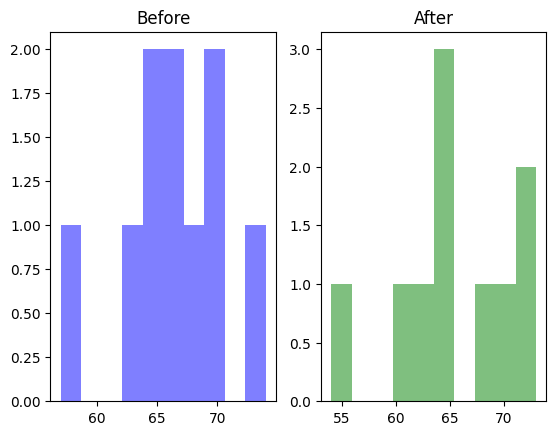

In [50]:
fig, ax = plt.subplots(1, 2)                                #create plot area
ax[0].hist(before, bins = 10, color = 'blue', alpha = 0.5)  #plot the before dataset
ax[0].set_title('Before')                                   #apply a title to the graph
ax[1].hist(after, bins = 10, color = 'green', alpha = 0.5)  #plot the after dataset
ax[1].set_title('After')                                    #apply a title to the graph

This generates a pair of graphs besire each other. Each has a seperate axis, with the before y axis going to 2 with teh after going to 3. This in its self is interesting. The following obesrvations can be made from these visualisations:

- x axis range goes from approx. 55 to 75, where as the after is shifted back. 
- looking at the distribution of data, before 4 people were recorded with heart rates 65 or under and after has 6 - showing a reduction which will likely impact mean
- before data peaks 3 times, all 65 plus, after has a single peak at 65


Now, lets put both histograms on one axis.


(array([1., 0., 0., 1., 1., 3., 0., 1., 1., 2.]),
 array([54. , 55.9, 57.8, 59.7, 61.6, 63.5, 65.4, 67.3, 69.2, 71.1, 73. ]),
 <BarContainer object of 10 artists>)

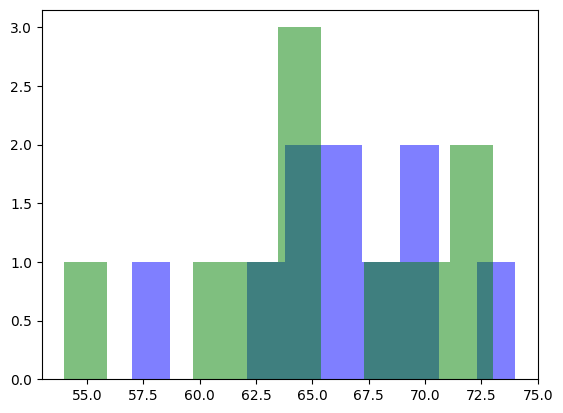

In [51]:
fig, ax = plt.subplots()                                                    #create plot area
ax.hist(before, bins = 10, color = 'blue', alpha = 0.5, label = 'Before')   #plot the before dataset
ax.hist(after, bins = 10, color = 'green', alpha = 0.5, label = 'After')    #plot the after dataset

This visualisation shows that the after dataset have certainly lower values over all. This analysis suggests that we do expect the mean of the after dataset is lower than the mean of the before dataset.

Next, we will dray a strip plot to further examine the data.

<Axes: >

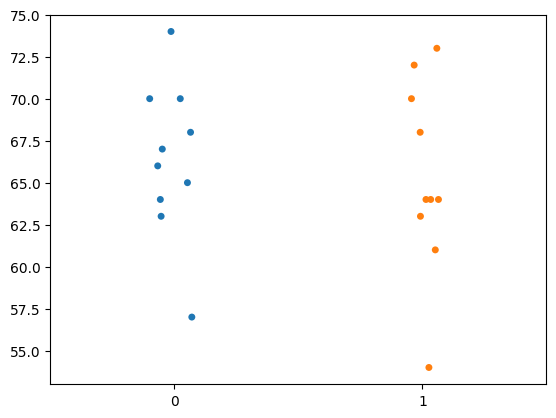

In [52]:
sns.stripplot(data=[before, after]) #use seaborn to generate stripplot

This analysis somewhat adds confusion, the values are heavily overlapping for the majority of the data points. One observation is that the highest value is in the before data set and the lowest is in the after value which does support our findings above but for the most part, the values appear to be very similar with no real clear difference in the data sets.

Now we will generate box plots to investigate if this visualisationw will give further insight. 

<Axes: >

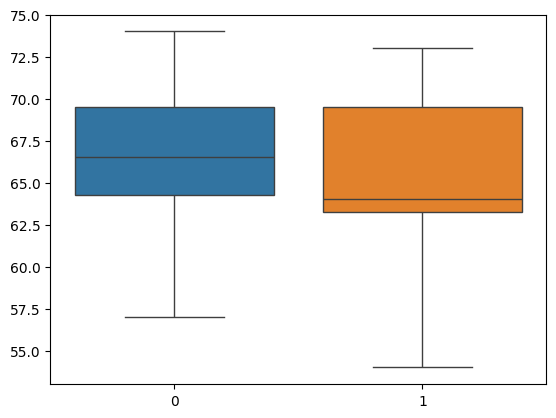

In [53]:
sns.boxplot(data=[before, after]) #use seaborn to generate boxplot

The above visualisation does give some more confidence to our above findings. The box plot clearly illustrates that the median value is approx 65 while the after dataset has a median value of approx. 64. Although there is a good amount of overlap in the box plots.

Next we will complete a t-test on the data. In this scenario, we will need to complete a paired value t-test as each value in the before data set corrisponds with a datapoint in the after dataset. we will complete this test in 2 ways, the first, manually in python, the second using the scipy libraray. 

References for calculating t-value manually:


- https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html#:~:text=What%20is%20the%20paired%20t,measurements%20is%20zero%20or%20not.
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/
- https://www.youtube.com/watch?v=_7IW2PUqe64
- https://sites.utexas.edu/sos/guided/inferential/numeric/onecat/2-groups/paired/paired-t/
- https://numpy.org/doc/2.1/reference/generated/numpy.sum.html
- https://numpy.org/doc/2.1/reference/generated/numpy.std.html
- https://datatab.net/tutorial/t-distribution


In [54]:
n = 10                                                          #number of cases in the study
df = n-1                                                        #degrees of freedom (number of cases -1)
diff = before - after                                           #calculate the difference between each of the values in the array
mean_diff = np.sum((diff))/n                                    #mean of the differnece between each of the cases
std_error = (np.std(diff, mean=mean_diff, ddof=1))/np.sqrt(n)   #calculate the standard error of the mean
t_val = mean_diff/std_error                                     #calculate the t value
print(t_val)                                                    #print the t-value

1.3372274824806283


Now that we have manually calculated our t value (1.337227), we need to determine if we can reject the null hypothesis. In order to do this, we need to identify the "critical" t value.
Assuming we set the significant value of 5%, we can find the critical t value using the t value tables. The following image is an extract from the table:

![T-test table](./images/t_test_table.jpg)

Becasue we have a significance level of 5%, and we have a two tailed we need to look at the 0.975 (1 - (0.05/2)) column and our degrees of freedom is calculated as 9, we need to look at the 9 row. Our critical t-value is 2.262 (drawn from above table). As the calculated t-value (1.337) is smaller than the critical value (2.262), the null hypothesis cannot be rejected.

Next we will use the built in t-test function in the scipy library

In [55]:
stats.ttest_rel(before, after) #run t-test using scipy library

TtestResult(statistic=np.float64(1.337227482480628), pvalue=np.float64(0.21396011317404623), df=np.int64(9))

Our null hypothesis is that the 2 week exercise program will have no impact on the heartrate of the subjects. A p value of 21.3% indicates that we can not reject the null hypothesis. 

Both approaches returned a t-test value of 1.33 and both suggested that we can not reject our null hypothesis that the 2 week exercise program has no effect on heatrate of participants.

---

### Task 4: ANOVA ###

**Question**

*In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.*

*Now use a loop to perform the following test 10,000 times.*

*Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.*

*Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.*

*Summarize and explain your results.*

A type 2 error occurs when we  do not reject the null hypothesis when we should, in the case of the anova test, our null hypothesis is that the means of the data sets are the same. For us to reject the null hypothesis, we need to demonstrate that the mean of each of the three data sets are different. As we are generating the data sets randomly with different means, we should reject the null hypothesis every time. 

![Errors](./images/errors.jpg)

In [82]:
no_type_ii = 0 #first we create a variable to store the count 

for n in range(10000): #intialise a for loop to repeat 10,000 times
    group_a = np.random.normal(4.9, 0.1, 100) #create data set a
    group_b = np.random.normal(5.0, 0.1, 100) #create data set b
    group_c = np.random.normal(5.1, 0.1, 100) #create data set c
    f_stat, p_val = stats.f_oneway(group_a,group_b,group_c)
    #print(p_val)
    #no_type_ii += 1
    if p_val < 0.05:
        no_type_ii += 1 #add 1 to the no_type_ii value
    else:
        pass
    

no_type_ii

10000

The above analysis repeats an anova test 10,000 on 10,000 different groups of data. We then counted each time a type ii error occured during the 10,000 tests, that is, where a null hypothesis was not rejected where it was false. 

As we have simulated the data set with different means, we know that the null hypothesis is false

We recorded no occurances of the null hypothesis not being rejected during this analysis, resulting in 10,000 occurances of a type ii error. The reason for this relates to the requried significance level and the parameters input when generating the data. As the means of the populations are all within 5% of one another (4.9 - 5.1) and the standard deviation of the data sets are all 0.1 (requirement of Anova that standard deviations are the same) - for the most part, all data points will be within 3 standard deviations ie minimum 4.6 and a maximum of 5.4. As the ANOVA test is a test of variance, and the variance between the mean is lower than the required 5% to reject the null hypothesis, we resulted in repeated type ii errors.

---